# Projeto I Análise de Dados
## Mariana Pereira e Ruhan Garatini

Este notebook tem como objetivo realizar a análise completa da base proposta
utilizando a base de dados `03_desempenho_estudantil.csv`.

## Desempenho Estudantil

### Descrição geral:
Contém dados educacionais sobre hábitos, rotinas, apoio familiar e fatores ambientais que ifluenciam o desempenho acadêmico dos estudantes.

### Desafios de análise:
- Avaliar a influência de sono, motivação e atividades extracurriculares.
- Verificar o impacto do nível socioeconômico.
- Identificar padrões de sucesso escolar.



In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [29]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/DataScience-2025/03_desempenho_estudantil.csv", sep=',')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Análise Inicial da Base

#### 1.1 Tema e Contexto Empresarial
A base apresenta dados sobre o desempenho dos estudantes em conjunto a dados que podem estar relacionados a ele, dessa forma, é possível analisar e levantar hipóteses sobre estatísticas que podem afetar de forma positiva ou negativa o desempenho de um aluno.

#### 1.2 Dicionário de dados traduzido:
- Hours_Studied: Horas de estudo semanais.
- Attendance: Frequência (%) nas aulas.
- Parental_Involvement: Envolvimento dos pais (Baixo, Médio, Alto).
- Access_to_Resources: Acesso a recursos educacionais (Baixo, Médio, Alto).
- Extracurricular_Activities: Participação em atividades extracurriculares (Sim, Não).
- Sleep_Hours: Horas de sono por noite.
- Previous_Scores: Desempenho anterior.
- Motivation_Level: Motivação do aluno (Baixa, Média, Alta).
- Internet_Access: Acesso à internet (Sim, Não).
- Tutoring_Sessions: Sessões de reforço por mês.
- Family_Income: Renda familiar (Baixa, Média, Alta).
- Teacher_Quality: Qualidade dos professores (Baixa, Média, Alta).
- School_Type: Tipo de escola (Pública, Privada).
- Peer_Influence: Influência dos colegas (Positiva, Neutra, Negativa).
- Physical_Activity: Atividade física semanal (horas).
- Learning_Disabilities: Dificuldades de aprendizagem (Sim, Não).
- Parental_Education_Level: Escolaridade dos pais (Ensino Médio, Superior, Pós).
- Distance_from_Home: Distância de casa para a escola.
- Gender: Gênero.
- Exam_Score: Nota final no exame

#### Número de registros: 6607


In [30]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


#### 1.3 Quantidade de dados nulos em cada variável

In [31]:
print(f'As variáveis com mais dados faltantes, em porcentagem (%), são:\n')
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)

As variáveis com mais dados faltantes, em porcentagem (%), são:



,0
Parental_Education_Level,1.362192
Teacher_Quality,1.180566
Distance_from_Home,1.014076
Hours_Studied,0.000000
Access_to_Resources,0.000000
Parental_Involvement,0.000000
Attendance,0.000000
Extracurricular_Activities,0.000000
Motivation_Level,0.000000
Internet_Access,0.000000


#### 1.4 Limpeza de dados

In [32]:
#Remover dados nulos
df.dropna(inplace=True)

# Remover os dados incorretos (nota maior do que 100)
df.drop(df[df.Exam_Score > 100].index, axis=0, inplace = True)

print(f'As variáveis com mais dados faltantes após alteração, em porcentagem (%), são:\n')
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)

As variáveis com mais dados faltantes após alteração, em porcentagem (%), são:



,0
Hours_Studied,0.0
Attendance,0.0
Parental_Involvement,0.0
Access_to_Resources,0.0
Extracurricular_Activities,0.0
Sleep_Hours,0.0
Previous_Scores,0.0
Motivation_Level,0.0
Internet_Access,0.0
Tutoring_Sessions,0.0


In [33]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000
mean,19.976008,80.018034,7.035126,75.063353,1.494747,2.972714,67.246825
std,5.985283,11.549434,1.468091,14.399766,1.233300,1.029006,3.891637
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,100.000000


## 2. Análise Estatística e Visual

### O que fazer nessa etapa:
- Distribuição das variáveis com histogramas e boxplots
- Medidas de tendência central e dispersão
- Matriz de correlação entre variáveis numéricas


---


### De acordo com o ANEXO I, devemos fazer a análise estatística e visual destes tópicos
- Avaliar a influência de sono, motivação e atividades extracurriculares.
- Verificar o impacto do nível socioeconômico.
- Identificar padrões de sucesso escolar.

#### 2.1 Histogramas e Boxplots

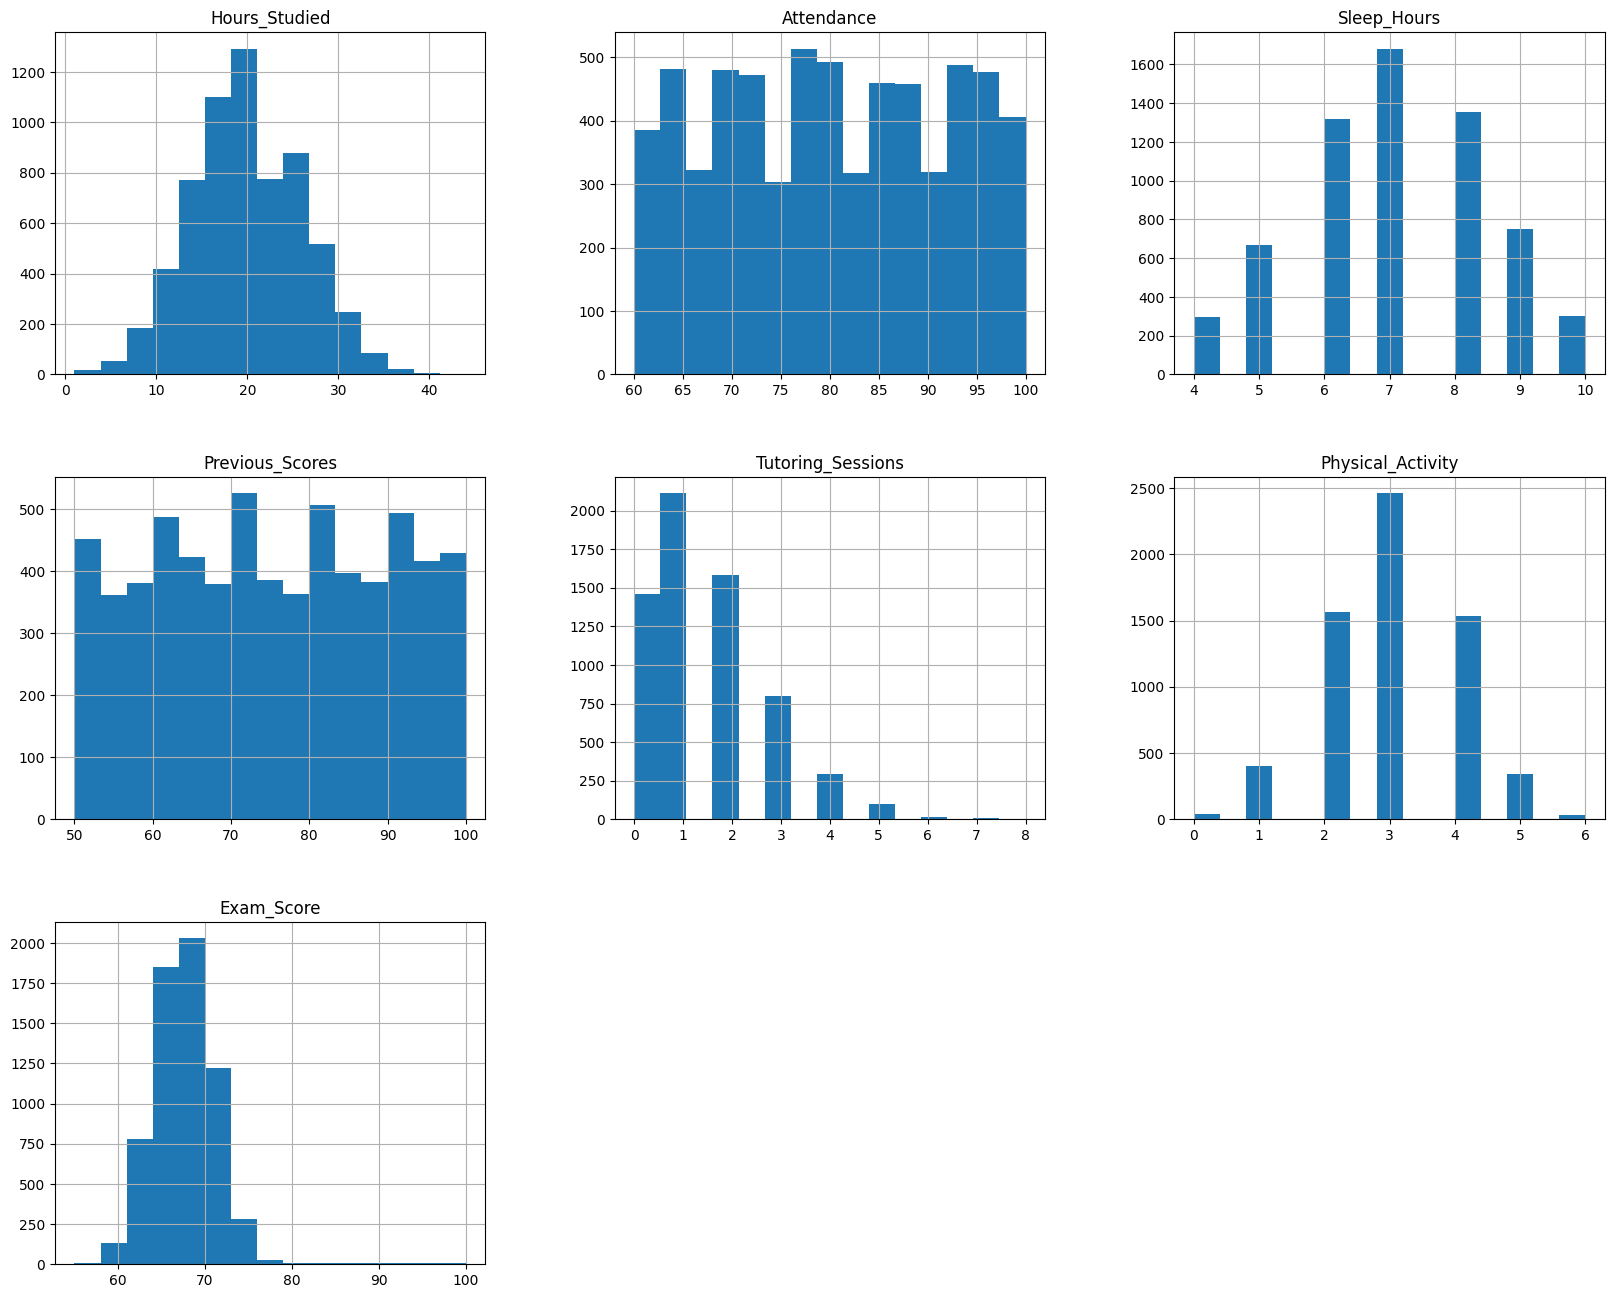

In [34]:
df.hist(bins=15, figsize=(20,16));

# Hours_Studied, Sleep_Hours, Physical_Activity, Exam_Score aparentam ser uma distribuição normal
# Tutoring_Sessions e Exam_Score aparentam ter outliers

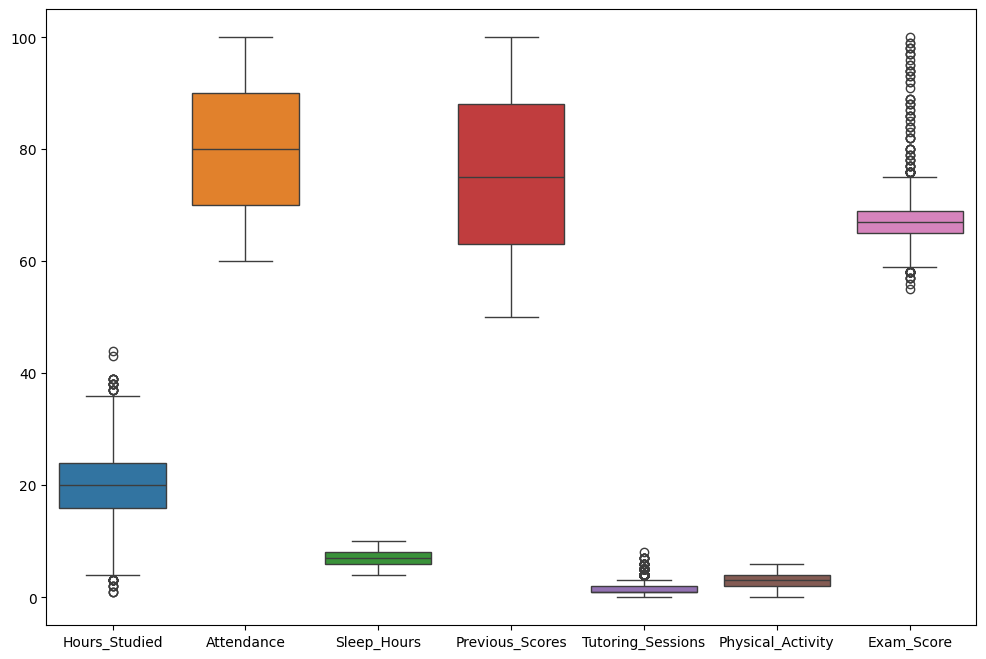

In [38]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.show()

# Alguns dados apresentam outliers, no entanto, são dados válidos

#### 2.2 Tendência central e dispersão

#### 2.3 Correlação entre variáveis

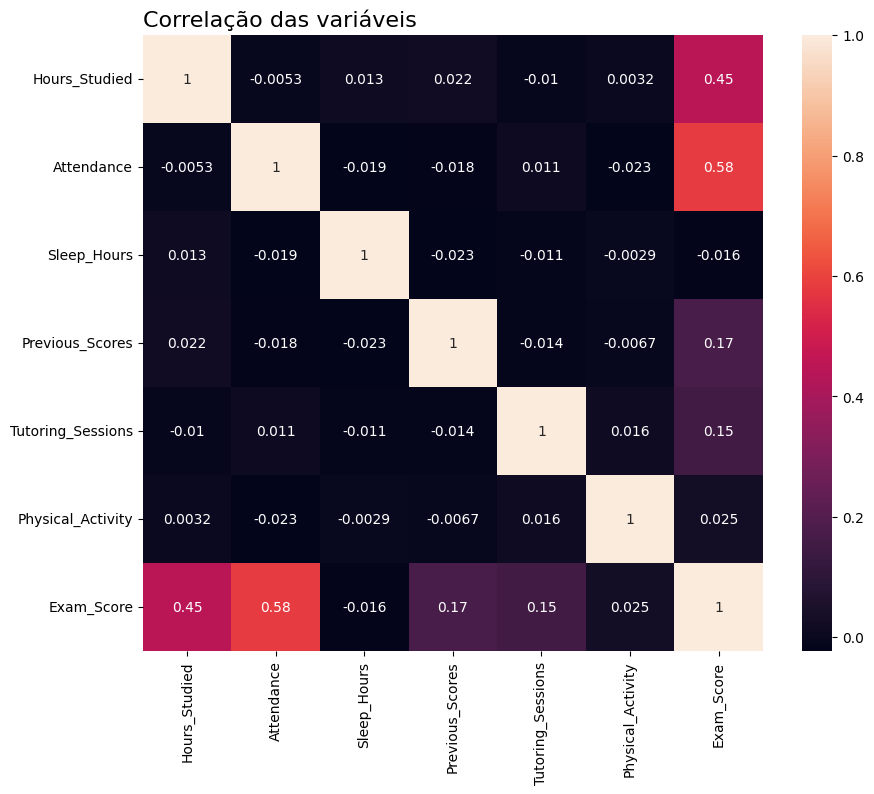

In [44]:
# Correlação

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='rocket')
plt.title('Correlação das variáveis', loc='left', fontsize=16)
plt.show()

# Os dados de Hours_Studied, Attendance, Previous_Scores e Tutoring_Sessions são os dados com maior correlação com as notas nos exames
# A frequência de participação nas aulas é a variável com maior correlação com as notas

## 3. Hipoteses

#### Uma das hipoteses pode ser "As pessoas de classe mais alta tiram notas maiores?"